In [163]:
from os.path import expanduser
import numpy
import scipy
import tensorflow as tf
from scipy.io import loadmat
import os
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [424]:
def get_precomputed_universal_perturbations(path_to_dir):
    universal=[]
    for filename in os.listdir(expanduser(path_to_dir)):
        if filename[-4:] == '.mat':
            universal.append(loadmat(expanduser(path_to_dir+str(filename)))['r'])
    return universal

def generate_universal_adversarial_images(data, perturbation, imshape):
    if(len(imshape)!= 3): return 
    perturbed_images = numpy.zeros((len(data),imshape[0],imshape[1],imshape[2]))
    for i in range(len(data)):
        currImage = scipy.misc.imresize(data[i,:,:,:],imshape)
        perturbed_images[i,:,:,:] = perturbation*1.0 + currImage*1.0
    return perturbed_images
        
def load_cifar():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train = X_train.transpose(0,2,3,1)
    X_test = X_test.transpose(0,2,3,1)
    return (X_train, y_train), (X_test,y_test)

def imshow(np_image):
    to_show = Image.fromarray(numpy.uint8(scipy.misc.imresize(np_image,(224,224,3))))
    return to_show

In [425]:
# loading precomputed universal perturbations
path_to_dir = "~/adversary/data/"
universal_perturbations = get_precomputed_universal_perturbations(path_to_dir)

#loading cifar-10 data
(X_train, y_train), (X_test, y_test) = load_cifar()
 
#generated perturbed test set data
x = generate_universal_adversarial_images(X_test, universal_perturbations[0], (224,224,3))

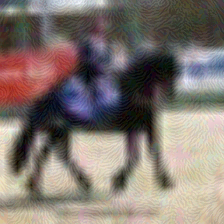

In [426]:
imshow(x[5000])

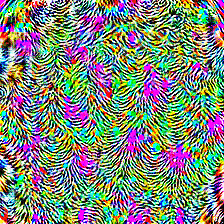

In [427]:
imshow(universal_perturbations[0])

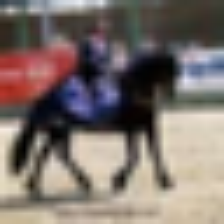

In [428]:
imshow(X_test[5000])